In [1]:
import pandas as pd

# Load the dataset (upload your file manually)
from google.colab import files
uploaded = files.upload()

# Assuming file is named titanic.csv
df = pd.read_csv("titanic (1) (1).csv")
df.head()


Saving titanic (1) (1).csv to titanic (1) (1) (1).csv


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Drop rows with missing 'embarked'
df.dropna(subset=['embarked'], inplace=True)

# Drop 'deck' column
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

# Convert 'survived' to string for better plotting
df['survived'] = df['survived'].astype(str)


/tmp/ipython-input-3-180256066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


/tmp/ipython-input-5-482981046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='survived', palette='Set2')


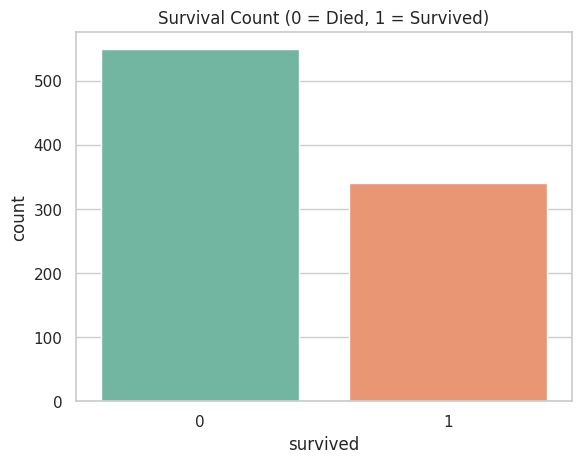

In [5]:
sns.countplot(data=df, x='survived', palette='Set2')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()


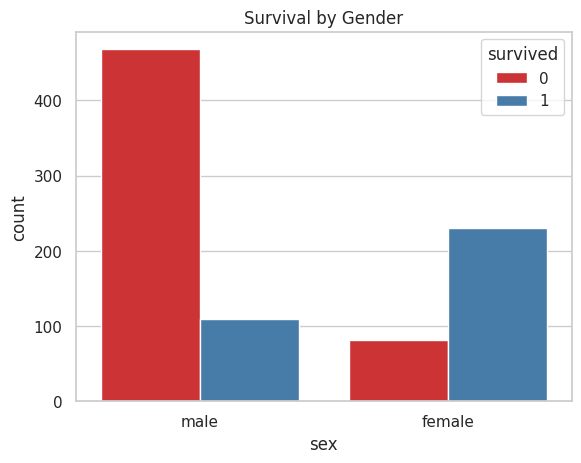

In [6]:
sns.countplot(data=df, x='sex', hue='survived', palette='Set1')
plt.title("Survival by Gender")
plt.show()


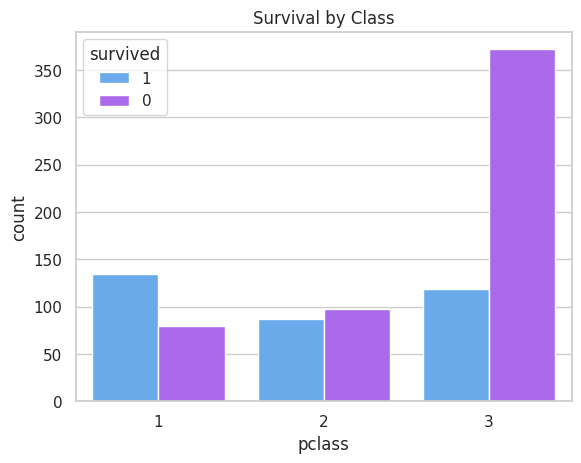

In [7]:
sns.countplot(data=df, x='pclass', hue='survived', palette='cool')
plt.title("Survival by Class")
plt.show()


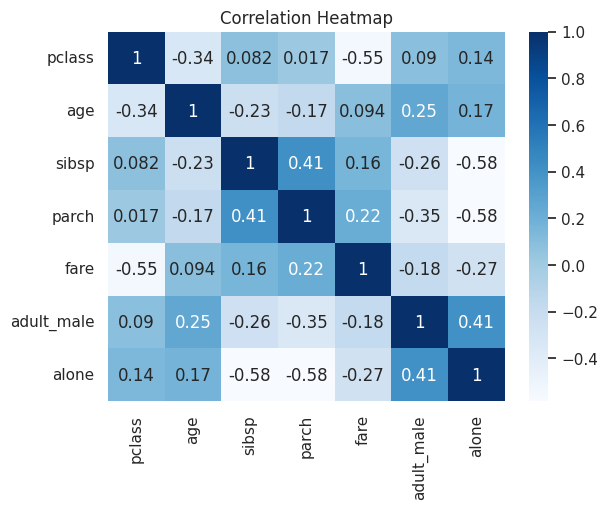

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


## Insights

- Females had a much higher chance of survival.
- First-class passengers were more likely to survive.
- Age did not strongly influence survival compared to gender and class.
- Correlation analysis shows 'fare' and 'pclass' have mild relationship to survival.
